<a href="https://colab.research.google.com/github/Adithyan773/Google-colab-models/blob/main/netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is the global reach of Netflix content?**

**Sub-questions**

**1.Which countries contribute the most titles to Netflix?**

**2.What are the most common genres produced in each country?**

**3.How does the release year distribution look for different countries?**

**4.Which countries have the most content types (Movies vs TV Shows)?**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv'
netflix_titles=pd.read_csv(file_path)
cleaned_df=netflix_titles.dropna()

# **Which countries contribute the most titles to Netflix?**

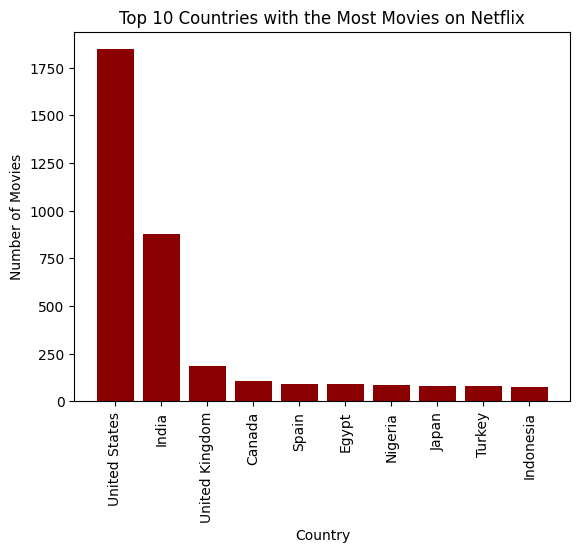

In [ ]:
country_counts=cleaned_df['country'].value_counts().head(10)

plt.bar(country_counts.index,country_counts.values,color='darkred')
plt.title("Top 10 Countries with the Most Movies on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.show()


**United States has the maximum number of movies in Netflix they release about 1846 movies in Netflix and Indonesia has the least number of movies released over the years**

# **What are the most common genres produced in each country?**

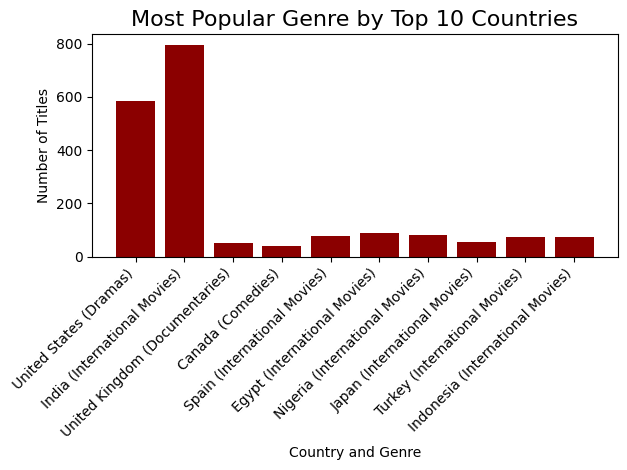

In [ ]:
top_countries =cleaned_df['country'].value_counts().head(10).index

genre_data =cleaned_df[cleaned_df['country'].isin(top_countries)]
genre_data = genre_data.assign(listed_in=genre_data['listed_in'].str.split(', ')).explode('listed_in')

country_genre= genre_data.groupby(['country', 'listed_in']).size().unstack(fill_value=0)

countries = []
genres = []
counts = []

for country in top_countries:

    max_genre = country_genre.loc[country].idxmax()
    max_count = country_genre.loc[country].max()

    countries.append(country)
    genres.append(max_genre)
    counts.append(max_count)

country_genre_labels = [f"{country} ({genre})" for country, genre in zip(countries, genres)]
bars = plt.bar(country_genre_labels, counts, color='darkred')
plt.title('Most Popular Genre by Top 10 Countries', fontsize=16)
plt.xlabel('Country and Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**International Movies are the most common genere produced by each country India has the most common genre content of international movies across the top 10 countries**

# **How does the release year distribution look for different countries?**

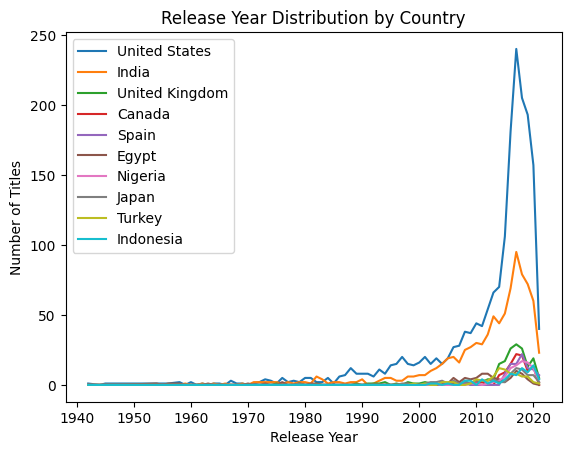

In [ ]:
top_countries = cleaned_df['country'].value_counts().head(10).index
release_year = cleaned_df.groupby(['country', 'release_year']).size().unstack().fillna(0)

for country in top_countries:
    plt.plot(release_year.columns, release_year.loc[country], label=country)

plt.title('Release Year Distribution by Country')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left')
plt.show()

**In this release year distribution by country most of the netflix titles get hiped after late 2000 . United States has the maximum number of titles in netflix they release about 240+ titles in the year gap of 2010 to 2020**

# **Which countries have the most content types (Movies vs TV Shows)?**

type            Movie  TV Show  Total
country                              
United States    1819       27   1846
India             868        7    875
United Kingdom    164       19    183
Canada            104        3    107
Spain              84        7     91
Egypt              90        0     90
Nigeria            84        4     88
Japan              73       10     83
Turkey             74        5     79
Indonesia          76        0     76


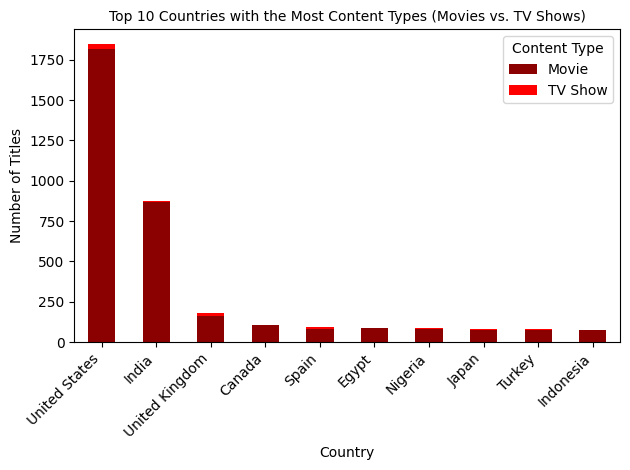

In [ ]:
netflix_data=cleaned_df.assign(country=cleaned_df['country'].str.split(', ')).explode('country')
country_type= cleaned_df.groupby(['country', 'type']).size().unstack(fill_value=0)
country_type['Total'] = country_type['Movie'] + country_type['TV Show']
top_country= country_type.sort_values('Total', ascending=False)
print(top_country.head(10))
top_10_countries = top_country.head(10).index
top_10_data = country_type.loc[top_10_countries, ['Movie', 'TV Show']]
top_10_data.plot(kind='bar', stacked=True,color=['darkred','red'] )
plt.title('Top 10 Countries with the Most Content Types (Movies vs. TV Shows)', fontsize=10)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

**This graph shows that USA has most content types (movies vs tv shows) and Indonesia has least content.**

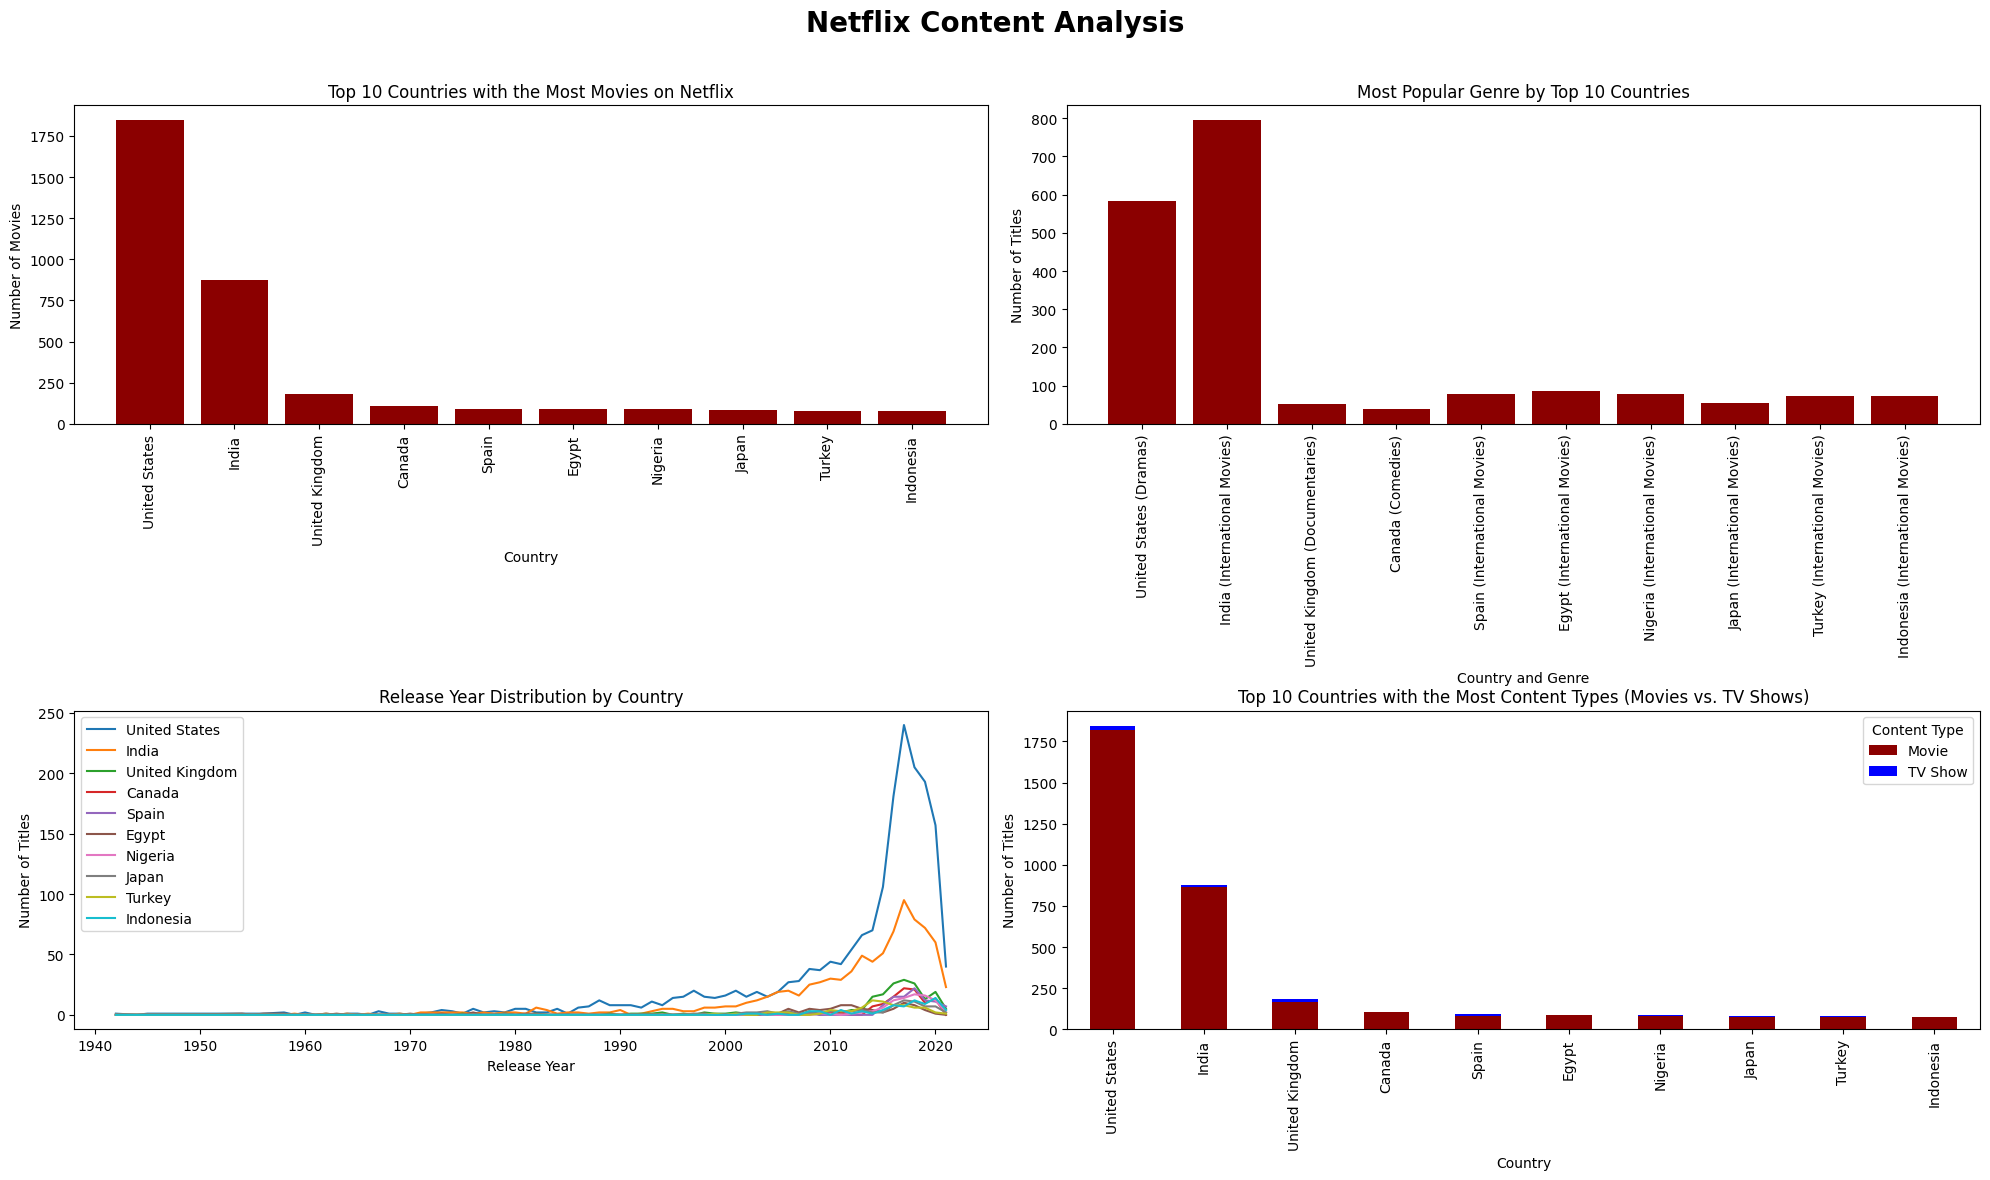

In [ ]:
import matplotlib.pyplot as plt
country_counts=cleaned_df['country'].value_counts().head(10)
fig, axs = plt.subplots(2, 2, figsize=(20,12))
axs[0,0].bar(country_counts.index,country_counts.values,color='darkred')
axs[0,0].set_title("Top 10 Countries with the Most Movies on Netflix")
axs[0,0].set_xlabel("Country")
axs[0,0].set_ylabel("Number of Movies")
axs[0,0].tick_params(axis='x',rotation=90)

top_countries =cleaned_df['country'].value_counts().head(10).index
genre_data =cleaned_df[cleaned_df['country'].isin(top_countries)]
genre_data = genre_data.assign(listed_in=genre_data['listed_in'].str.split(', ')).explode('listed_in')
country_genre= genre_data.groupby(['country', 'listed_in']).size().unstack(fill_value=0)
countries = []
genres = []
counts = []
for country in top_countries:

    max_genre = country_genre.loc[country].idxmax()
    max_count = country_genre.loc[country].max()

    countries.append(country)
    genres.append(max_genre)
    counts.append(max_count)
country_genre_labels = [f"{country} ({genre})" for country, genre in zip(countries, genres)]
bars = axs[0,1].bar(country_genre_labels, counts, color='darkred')
axs[0,1].set_title('Most Popular Genre by Top 10 Countries')
axs[0,1].set_xlabel('Country and Genre')
axs[0,1].set_ylabel('Number of Titles')
axs[0,1].tick_params(axis='x',rotation=90)

top_countries = cleaned_df['country'].value_counts().head(10).index
release_year = cleaned_df.groupby(['country', 'release_year']).size().unstack().fillna(0)
for country in top_countries:
    axs[1,0].plot(release_year.columns, release_year.loc[country], label=country)

axs[1,0].set_title('Release Year Distribution by Country')
axs[1,0].set_xlabel('Release Year')
axs[1,0].set_ylabel('Number of Titles')
axs[1,0].legend(loc='upper left')

netflix_data=cleaned_df.assign(country=cleaned_df['country'].str.split(', ')).explode('country')
country_type= cleaned_df.groupby(['country', 'type']).size().unstack(fill_value=0)
country_type['Total'] = country_type['Movie'] + country_type['TV Show']
top_country= country_type.sort_values('Total', ascending=False)
top_10_countries = top_country.head(10).index
top_10_data = country_type.loc[top_10_countries, ['Movie', 'TV Show']]
top_10_data.plot(kind='bar', stacked=True,color=['darkred','blue'],ax=axs[1,1] )
axs[1,1].set_title('Top 10 Countries with the Most Content Types (Movies vs. TV Shows)')
axs[1,1].set_xlabel('Country')
axs[1,1].set_ylabel('Number of Titles')
axs[1,1].tick_params(axis='x',rotation=90, )
axs[1,1].legend(title='Content Type')
fig.suptitle('Netflix Content Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**This analysis provides valuable insights into how different countries contribute to Netflix's content library. The data highlights key areas of dominance, emerging trends, and the content available across regions.**